Author: [DistilledData](https://github.com/DistilledData)

%%latex
\setcounter{tocdepth}{5}
\tableofcontents
\pagebreak

# Common Probability Distributions: Discrete

This notebook will introduce some common discrete probability distributions that are used by data scientists and statisticians. Whenever someone uses these distributions to describe a complex population, such as subscribers at a company or the suppliers in a complex market, in general they are not claiming the distribution perfectly describes the population. In most cases, they are making simplifying assumptions in order to create a model that is easier to interpret, and can take advantage of the well-known mathematical properties for a given distribution.

This is not meant to be a comprehensive list of every discrete distribution in existence. Rather, this notebook will present a sampling of some of the more popular distributions. 

A brief note about notation. Unlike much of ordinary mathematics where $\sim$ is taken to mean "approximate", the field of statistics uses the symbol $\sim$ to denote that a random variable *is* a certain distribution. For example, "$X\sim B(n,p)$" means that the random variable $X$ *is* a Bernoulli distribution with $n$ trials and with probability of success $p$.

## Discrete Uniform Distribution

A discrete uniform distribution is a probability distribution  over a [finite set](https://en.wikipedia.org/wiki/Finite_set) $S$ that has a finite number of elements, denoted $n$, such that each outcome in $S$ has probability $\frac{1}{n}$. While $S$ can be anything, such as marbles in a sack each with a unique symbol, we can make our lives a bit easier by assigning an index $i\in\{1,\cdots, n\}$ to each element in $S$.

To make this discussion even slightly more general, we  will instead assign the index $i$ to a number in the set $\{a,\cdots,b\}$ for some $a,b\in\mathbb{N}$. In order to provide more intuition when discussing statistical values, such as mean, median and variance, I will restrict the discussion to examples that involve finite sets $[a,b]\subseteq\mathbb{N}$, rather than sets like the bag of marbles that involve and intermediate mapping to integers.

The cannonical examples for this distribution are rolling a fair n-sided die.

For the following properties below, we will consider a discrete uniform distribution $U$ in the range $[a,b]\in\mathbb{N}$. The number of items in this distribution is $n=b-a+1$.



### PMF

Given a distribution $X\sim U(a,b)$, each outcome in the integer range $[a,b]$ is equally likely, each item has probability $\frac{1}{n}$. In other words,

$\forall k\in\{a,a+1,\cdots,b-1,b\}$ $p_{U}(k)=P(X=k)=\frac{1}{n}$

### CDF

Given distribution $X\sim U(a,b)$, we expect that every integer from $a$ to $b$ adds an additional $\frac{1}{n}$ to the CDF such that the $\forall x<a$ $F(x)=0$ and $\forall x\ge b$ $F(x)=1$. We summarize this in the formula below.

$$F_{U}(u)=P(X\le u)=\frac{\lfloor u\rfloor-a+1}{n}$$

### Mean

Given distribution $X\sim U(a,b)$, $\mathbb{E}[X]=\mu_{U}=\frac{a+b}{2}$

#### Proof

$\mu_{U}=\frac{\sum\limits_{i=a}^b i}{n}=\frac{(a+b)n}{2n}=\frac{a+b}{2}$

### Median

The median of $U$ is $\frac{a+b}{2}$

#### Proof

Suppose $n$ is even. There are $\frac{n}{2}$ elements that are less than or equal to $a+\frac{n}{2}-1$ (the number of elements in the range $[a,a+\frac{n}{2}-1]$ is $(a+\frac{n}{2}-1)-a+1=\frac{n}{2})$, and $\frac{n}{2}$ elements greater than $b-\frac{n}{2}+1$ (similarly the number of elements between $b-\frac{n}{2}+1$ and $b$ is $b-(b-\frac{n}{2}+1)+1=\frac{n}{2}$. The median is the average of the two, or $\frac{a+b}{2}$.

Suppose $n$ is odd. There are $\frac{n-1}{2}$ elements less than $a+\frac{n-1}{2}$ (the number of elements in the range $[a,a+\frac{n-1}{2}-1]$ is $\frac{n-1}{2}$ using similar computations to those above). This means that there are $n-1-\frac{n-1}{2}=\frac{n-1}{2}$ elements above $a_\frac{n-1}{2}$, and hence is the median. Using the fact that $n=b-a+1$, we can simplify the expression to $a+\frac{n-1}{2}-1=a+\frac{b-a+1-1}{2}-1=\frac{a+b}{2}$

Therefore, the median is $\frac{a+b}{2}$.

### Variance

Given distribution $X\sim U(a,b)$, $\text{Var}(X)=\frac{(b-a+1)^2-1}{12}$

#### Proof

Warning to the reader: the following proof is rather tedious and computationally intensive.

**Lemma: for all  integers $n\ge1$ $\sum\limits_{i=1}^ni^2=\frac{n(n+1)(2n+1)}{6}$**

We will show the above formula by induction. While we only need one base case, I want to show that this formula works for a few different values of $n$ to appreciate its majesty.

$$\begin{aligned}
\sum\limits_{i=1}^1 i^2&=\frac{1(1+1)(2+1)}{6}=\frac{6}{6}=1 \\
\sum\limits_{i=1}^2 i^2&=\frac{2(2+1)(4+1)}{6}=5 \\
\sum\limits_{i=1}^3 i^2&=\frac{3(3+1)(6+1)}{6}=14
\end{aligned}$$

Now we assume that for all integers $n\ge1$, $\sum\limits_{n=1}^ni^2=\frac{n(n+1)(2n+1)}{6}$. We now need to show that the formula is valid for $n+1$

$$\begin{aligned}
\sum\limits_{i=1}^{n+1}i^2&=(n+1)^2+\sum\limits_{i=1}^ni^2=(n+1)^2+\frac{n(n+1)(2n+1)}{6} \\
&=\frac{n+1}{6}\big(6n+6+2n^2+n\big)=\frac{n+1}{6}\big(2n^2+7n+6\big)=\frac{n+1}{6}(2n+3)(n+2) \\
&=\frac{(n+1)\big((n+1)+1\big)\big(2(n+1)+1\big)}{6}
\end{aligned}$$

**Claim: $\mathbb{E}[X]^2=\bigg(\frac{a+b}{2}\bigg)^2=\frac{a^2+2ab+b^2}{4}$**

$$\begin{aligned}
\mathbb{E}[X^2]&=\sum\limits_{i=a}^bi^2p_{U}(i)=\sum\limits_{i=a}^bi^2\frac{1}{b-a+1}=\frac{1}{b-a+1}\sum\limits_{i=a}^bi^2 \\
&=\frac{1}{b-a+1}\Bigg[\sum\limits_{i=1}^bi^2-\sum\limits_{i=1}^{a-1}i^2\Bigg] \\
&=\frac{1}{b-a+1}\Bigg[\frac{b(b+1)(2b+1)}{6}-\frac{(a-1)\big((a-1)+1\big)\big(2(a-1)+1\big)}{6}\Bigg] \\
&=\frac{1}{b-a+1}\Bigg[\frac{b(b+1)(2b+1)}{6}-\frac{a(a-1)(2a-1)}{6}\Bigg]=\frac{1}{b-a+1}\Bigg[\frac{[b(b+1)(2b+1)]-[a(a-1)(2a-1)]}{6}\Bigg] \\
&=\frac{1}{b-a+1}\Bigg[\frac{\big[(2b^3+3b^2+b)\big]-\big[(2a^3-3a^2+a)\big]}{6}\Bigg]=\frac{1}{b-a+1}\Bigg[\frac{2b^3+3b^2+b-2a^3+3a^2-a}{6}\Bigg] \\
\end{aligned}$$

$\mathbb{E}[X]^2=\bigg(\frac{a+b}{2}\bigg)^2=\frac{a^2+2ab+b^2}{4}$

We will adjust the expresesions for $\mathbb{E}[X^2]$ and $\mathbb{E}[X]^2$ to the common denominator $12(b-a+1)$.

$$\begin{aligned}
\mathbb{E}[X^2]&=\frac{1}{b-a+1}\Bigg[\frac{2b^3+3b^2+b-2a^3+3a^2-a}{6}\Bigg] \\
&=\frac{1}{b-a+1}\Bigg[\frac{2}{2}\frac{2b^3+3b^2+b-2a^3+3a^2-a}{6}\Bigg]=\frac{1}{b-a+1}\Bigg[\frac{4b^3+6b^2+2b-4a^3+6a^2-2a}{12}\Bigg] \\
&=\frac{1}{12(b-a+1)}\big(4b^3+6b^2+2b-4a^3+6a^2-2a\big)
\end{aligned}$$

$$\begin{aligned}
\mathbb{E}[X]^2&=\frac{a^2+2ab+b^2}{4} \\
&=\frac{3(b-a+1)}{3(b-a+1)}\frac{a^2+2ab+b^2}{4}=\frac{3}{12(b-a+1)}\bigg[\big(b-a+1\big)\big(a^2+2ab+b^2\big)\bigg] \\
&=\frac{3}{12(b-a+1)}\bigg[a^2b+2ab^2+b^3-a^3-2a^2b-ab^2+a^2+2ab+b^2\bigg] \\
&=\frac{3}{12(b-a+1)}\bigg[ab^2+b^3-a^3-a^2b+a^2+2ab+b^2\bigg] \\
&=\frac{1}{12(b-a+1)}\big(3ab^2+3b^3-3a^3-3a^2b+3a^2+6ab+3b^2\big) \\
\end{aligned}$$

We can now compute the variance

$$\begin{aligned}
\mathbb{E}[X^2]-\mathbb{E}[X]^2&=\frac{1}{12(b-a+1)}\Bigg[\big(4b^3+6b^2+2b-4a^3+6a^2-2a\big) \\
&-\big(3ab^2+3b^3-3a^3-3a^2b+3a^2+6ab+3b^2\big)\Bigg] \\
&=\frac{1}{12(b-a+1)}\big(b^3+3b^2+2b-a^3+3a^2-2a-3ab^2+3a^2b-6ab\big) \\
\end{aligned}$$

$$\begin{aligned}
\mathbb{E}[X^2]-\mathbb{E}[X]^2&=\frac{1}{12(b-a+1)}\big(b^3+3b^2+2b-a^3+3a^2-2a-3ab^2+3a^2b-6ab\big) \\
\end{aligned}$$

If you have been following up to this point, please take a deep breath (you deserve it!). 

We will the fact that $(b-a+1)^2=b^2-2ba+2b-2a+a^2+1$ to guide our term grouping and complete our proof. 

$$\begin{aligned}
\mathbb{E}[X^2]-\mathbb{E}[X]^2&=\frac{1}{12(b-a+1)}\Bigg(\big(b^3-ab^2+b^2\big)+\big(2b^2-2ab+2b\big)+ \\
&\big(a^2b-a^3+a^2\big)-\big(2ab-2a^2+2a\big)-\big(2ab^2-2a^2b+2ab\big)\Bigg) \\
&=\frac{1}{12(b-a+1)}\Bigg(\big(b^3-ab^2+b^2\big)+\big(2b^2-2ab+2b\big)+\big(a^2b-a^3+a^2\big) \\
&-\big(2ab-2a^2+2a\big)-\big(2ab^2-2a^2b+2ab\big)+(b-a+1)\Bigg)-(b-a+1) \\
&=\frac{1}{12(b-a+1)}\Bigg(\big(b-a+1\big)b^2+\big(b-a+1\big)2b+\big(b-a+1\big)a^2 \\
&-\big(b-a+1\big)2a-\big(b-a+1\big)2ab+(b-a+1)\Bigg)-(b-a+1) \\
&=\frac{b-a+1}{12(b-a+1)}\Bigg(\big(b^2+2b+a^2-2a-2ab+1\big)-1\Bigg)=\frac{(b-a+1)^2-1}{12} \\
\end{aligned}$$

### Mode

Since all values have the same probability, any value in the  support is a valid mode.

%%latex
\pagebreak

### Example: Rolling a Die

The canonical example of a discrete uniform distribution is rolling a fair six-sided die. The probability of drawing 1, 2, 3, 4,5 or 6 is $\frac{1}{6}$. The metrics we discussed above for this example is shown below.

**Table for PMF and CDF**

In [20]:
import pandas as pd

probabilities = {"value": [i for i in range(1,7)], "probability": [1/6 for i in range(6)], 
                 "cumulative probability": [i/6 for i in range(1,7)]}

data = pd.DataFrame(probabilities)
print(data.to_string(index=False))

 value  probability  cumulative probability
     1     0.166667                0.166667
     2     0.166667                0.333333
     3     0.166667                0.500000
     4     0.166667                0.666667
     5     0.166667                0.833333
     6     0.166667                1.000000


%%latex
\pagebreak

**PMF:** $\forall k\in\{1,2,3,5,6\}$ $p_{U}(k)=P(U=k)=\frac{1}{6}$

**Graph for PMF**

Text(0.5, 1.0, 'PMF for Rolling a Die')

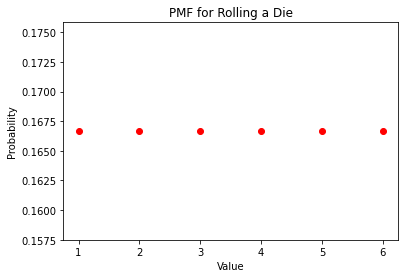

In [22]:
import matplotlib.pyplot as plt

plt.plot([i for i in range(1,7)], [1/6 for i in range(6)], 'ro')
plt.xlabel("Value")
plt.ylabel("Probability")
plt.title("PMF for Rolling a Die")

%%latex
\pagebreak

**CDF:** $\forall x\in\mathbb{R}$ $F_{U}(x)=P(U\le x)=\frac{\lfloor x\rfloor - 1 + 1}{6}=\frac{\lfloor x \rfloor}{6}$

**Graph for CDF**

Text(0.5, 1.0, 'CDF for Rolling a Die')

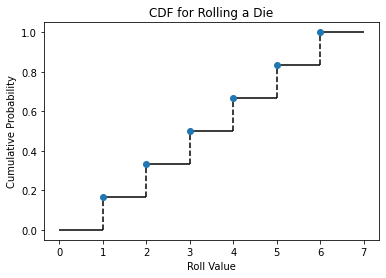

In [21]:
fig, ax = plt.subplots()

values = [i for i in range(1,7)]
cdf = [i/6 for i in range(1,7)]

# https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.hlines.html
ax.hlines(y=cdf[:-1], xmin=values[:-1], xmax=values[1:],
          zorder=1)

ax.hlines(y=[0], xmin=[0], xmax=[1],
          zorder=1)

ax.hlines(y=[1], xmin=[6], xmax=[7],
          zorder=1)

# https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.vlines.html
ax.vlines(x=values[1:], ymin=cdf, ymax=cdf[1:], 
          linestyle='dashed', zorder=1)

ax.vlines(x=[1], ymin=[0], ymax=[1/6], 
          linestyle='dashed', zorder=1)

ax.scatter(values,cdf)
plt.xlabel("Roll Value")
plt.ylabel("Cumulative Probability")
plt.title("CDF for Rolling a Die")

**Mean:** $\frac{1+6}{2}=3.5$

**Median:** $\frac{1+6}{2}=3.5$

**Variance:** $\frac{(6-1+1)^2-1}{12}=\frac{35}{12}=2.9177$

**Mode:** 1, 2, 3, 4, 5, 6

%%latex
\pagebreak

## Bernoulli Distribution

A Bernoulli distribution is a probability distribution with two outcomes: 1 with probability $p$; and 0 with probability $1-p$. A Bernoulli distribution can also be thought of as a binomial distribution with one trial (see next section for more information on the binomial distribution).

A  cannonical example is tossing a (possibly unfair) coin that has  probability of heads $p$ and probability of tails $p-1$.

### PMF

$\forall k\in\{0,1\}$, $p_X(X=k)=\begin{cases} 1-p & k=0 \\ p & k=1 \end{cases}=p^k(1-p)^{1-k}$

### CDF

$\forall x\in\mathbb{R}$ $F_X(x)=P(X\le x)=\begin{cases} 0 & x < 0 \\ 1-p & 0\le x < 1 \\ p  & x\ge 1\end{cases}$

### Mean

$\mathbb{E}[X]=1\cdot p + 0\cdot (1-p)=p$

### Median

Let $F^{-1}_X$ denote the [pre-image](https://mathworld.wolfram.com/Pre-Image.html) of the CDF $F_X$ for a Bernoulli distribution.

$F^{-1}_X(0.5)=\begin{cases} 0 & p < 0.5 \\ [0,1) & p = 0.5 \\ 1 & p > 0.5 \end{cases}$

### Variance

$\text{Var}(X)=p(1-p)$

#### Proof

$\mathbb{E}[X^2]=1^2\cdot  p + 0^2\cdot (1-p)=p$

$\mathbb{E}[X]^2=p^2$

$\implies\text{Var}(X)=\mathbb{E}[X^2]-\mathbb{E}[X]^2=p-p^2=p(1-p)$

### Mode

Since there are only two values, the mode will be the value with the greater probability.

$\text{mode}=\begin{cases} 0 & p < 0.5 \\ 0,1 & p=0.5 \\ 1 & p>0.5\end{cases}$

### Example: Flipping a Coin

We will consider the case of flipping an unfair coin wheree probability of heads is 0.8.

**PMF:** $\forall k\in\{0,1\}$ $p_X(k)=0.8^p0.2^{1-p}$

**Graph for PMF**

Text(0.5, 1.0, 'PMF for Fliipping a Coin')

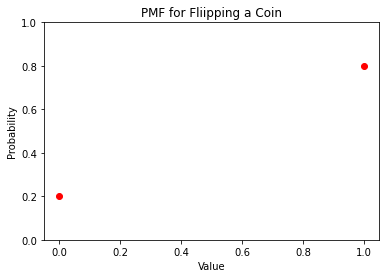

In [20]:
import matplotlib.pyplot as plt

plt.plot([0,1], [0.2,0.8], 'ro')
plt.ylim((0,1))
plt.xlabel("Value")
plt.ylabel("Probability")
plt.title("PMF for Fliipping a Coin")

**CDF:** $\forall x\in\mathbb{R}$ $F_X(x)=P(X\le x)=\begin{cases}0 & x < 0 \\ 0.8  & 0\le x<1 \\ 1 & x\ge 1\end{cases}$

**Graph for CDF**

Text(0.5, 1.0, 'CDF for Flipping a Coin')

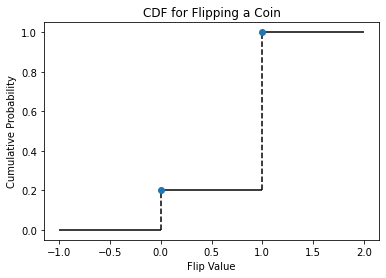

In [11]:
fig, ax = plt.subplots()

values = [0,1]
cdf = [0.2,1]

# https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.hlines.html
ax.hlines(y=cdf[:-1], xmin=values[:-1], xmax=values[1:],
          zorder=1)
ax.hlines(y=[0], xmin=[-1], xmax=[0], zorder=1)
ax.hlines(y=[1], xmin=[1], xmax=[2], zorder=1)

# https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.vlines.html
ax.vlines(x=values[1:], ymin=cdf, ymax=cdf[1:], 
          linestyle='dashed', zorder=1)
ax.vlines(x=[0], ymin=[0], ymax=[0.2], 
          linestyle='dashed', zorder=1)

ax.scatter(values,cdf)
plt.xlabel("Flip Value")
plt.ylabel("Cumulative Probability")
#plt.ylim((0,1.25))
plt.title("CDF for Flipping a Coin")

**mean:** 0.8

**median:** 1

**variance:** 0.16

**mode:** 1

%%latex
\pagebreak

## Binomial Distribution

Given an experiment with possible outcomes 1 with probability $p$ and 0 with probability $1-p$, a binomial distribution, denoted $B(n,p)$, measures the number of times an experiment has an outcome of 1 after conducting $n$ experiments.

$B(n,p)$ has support (the random variable can take on values)  $\{0,1,\cdots,n\}$

A cannonical example is counting the number of heads after flipping a (possibly unfair) coin $n$ times.

Since there are no straight-forward formulas for median or mode, we will omit these in the properties  below.

### PMF

Given distribution $X\sim B(n,p)$, $\forall k\in\{0,1,\cdots,n\}$ $f_{\cal{B}}(k)=p_{\cal{B}}(X=k)={n \choose k}p^k(1-p)^{n-k}$

#### Proof

Consider some combination of (0,1,...) that has x successes out of n trials. If we suppose that outcome 1 has probability of $p$, then the above combination has probability $p^x(1-p)^{n-x}$. Since there are x repeats for 1 and n-x repeats of 0, the number of ways to have x successes in n trials is $\frac{n!}{x!(n-x)!}$, which is the same as ${n  \choose x}$. We could have also noted that we need to choose x out of n slots for a 1, which also gives us ${n \choose x}$. 

Therefore the total probability that we will have x successes out of n trials is given by $\sum\limits_{i=0}^{{n\choose x}}p^x(1-p)^{n-x}={n\choose x}p^x(1-p)^x$

### CDF

Given distribution $X\sim B(n,p)$, $\forall x\in\mathbb{R}$, $F_{\cal{B}}(x)=P(X\le x)=\sum\limits_{i=0}^{\lfloor x\rfloor}{n \choose k}p^i(1-p)^{n-i}$

### Binomial Distribution as Sum of Bernoulli

If we are given independent random variables $X_1,\cdots,X_n$ where the $X_i\sim\text{Bernoulli}(p)$ for some $p\in[0,1]$, then $Y=\sum\limits_{i=0}^nX_i\sim\text{Binomial}(n,p)$

#### Proof

Suppose we have independent Bernoulli distributions $X_1,\cdots,X_n$ with probability $p\in[0,1]$. Let $Y=X_1+\cdots+X_n$. $\forall k\in\{0,\cdots, n\}$, we need to choose $k$ out of the $n$ Bernoulli trials to be a success. The probability of $k$ successful trials is $p^k$ and the probability of $n-k$ unsuccessful trials is $(1-p)^{n-k}$.

$f_Y(k)=P(Y=k)=P(\text{k successful }X_i\&\text{n-k unsuccessful }X_i)={n\choose k}p^k(1-p)^{n-k}$

$\therefore Y\sim\text{Binomial}(n,p)$

### Mean

Given $X\sim B(n,p)$, $\mathbb{E}[X]=\mu_{\cal{B}}=np$

#### Proof

Given distribution $X\sim B(n,p)$, let $X=X_1+\cdots+X_n$ where $X_i$ are independent Bernoulli distributions.

$\mathbb{E}[X]=\mathbb{E}[X_1+\cdots+X_n]=\mathbb{E}[X_1]+\cdots+\mathbb{E}[X_n]=p+\cdots+p=np$

### Variance

Given distribution $X\sim B(n,p)$, $\text{Var}(X)=np(1-p)$

#### Proof

Given distribution $X\sim B(n,p)$, let $X=X_1+\cdots+X_n$ where $X_i$ are independent Bernoulli distributions. Since the $X_i$ are independent, $\forall i\ne j$ $\text{Cov}(X_i,X_j)=0$.

$\implies\text{Var}(X)=\sum\limits_{i=1}^n\text{Var}(X_i)=\sum\limits_{i=1}^np(p-1)=np(p-1)$

%%latex
\pagebreak

### Example: 10 Coin Flips

For  our example we will simulate 10 coin flips with an unfair coin that has probability of success 0.8, which gives  us a distribution of $\cal{B}(10,0.8)$.

**Table for PMF and CDF**

In [23]:
from math import factorial
import numpy as np
import pandas as pd

def  comb(n,k):
    return factorial(n)/(factorial(k)*factorial(n-k))

k = [i for i in range(11)]
pmf = [comb(10,i)*(0.8**i)*(0.2**(10-i)) for i in range(11)]
cdf = np.cumsum(pmf)

probabilities = {"value": k, "probability": pmf, 
                 "cumulative probability": cdf}

data = pd.DataFrame(probabilities)
print(data.to_string(index=False))

 value   probability  cumulative probability
     0  1.024000e-07            1.024000e-07
     1  4.096000e-06            4.198400e-06
     2  7.372800e-05            7.792640e-05
     3  7.864320e-04            8.643584e-04
     4  5.505024e-03            6.369382e-03
     5  2.642412e-02            3.279350e-02
     6  8.808038e-02            1.208739e-01
     7  2.013266e-01            3.222005e-01
     8  3.019899e-01            6.241904e-01
     9  2.684355e-01            8.926258e-01
    10  1.073742e-01            1.000000e+00


%%latex
\pagebreak

**PMF:** Given distribution $X\sim B(n,p)$, $\forall k\in\{0,\cdots,10\}$, $f_{\cal{B}}(k)=P(X=k)={10\choose k}0.8^k0.2^{10-k}$

**Graph for PMF**

Text(0.5, 1.0, 'PMF')

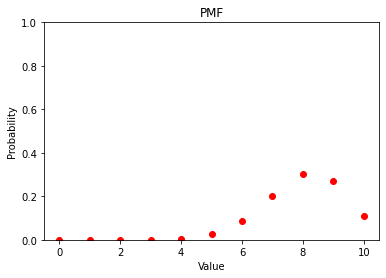

In [10]:
import matplotlib.pyplot as plt

plt.plot(k, pmf, 'ro')
plt.ylim((0,1))
plt.xlabel("Value")
plt.ylabel("Probability")
plt.title("PMF")

%%latex
\pagebreak

**CDF:** $\forall x\in\mathbb{R}$ $F_{\cal{B}}(x)=P(X\le x)=\sum\limits_{i=1}^{\lfloor x\rfloor}{10\choose i}0.8^i0.2^{10-i}$

**Graph for CDF**

Text(0.5, 1.0, 'CDF for Flipping Coin 10 Times')

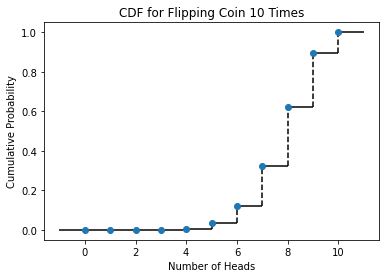

In [24]:
fig, ax = plt.subplots()

# https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.hlines.html
ax.hlines(y=cdf[:-1], xmin=k[:-1], xmax=k[1:],
          zorder=1)

ax.hlines(y=[0], xmin=[-1], xmax=[0],
          zorder=1)

ax.hlines(y=[1], xmin=[10], xmax=[11],
          zorder=1)

# https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.vlines.html
ax.vlines(x=k[1:], ymin=cdf, ymax=cdf[1:], 
          linestyle='dashed', zorder=1)

ax.vlines(x=[0], ymin=[0], ymax=cdf[0], 
          linestyle='dashed', zorder=1)

ax.scatter(k,cdf)
plt.xlabel("Number of Heads")
plt.ylabel("Cumulative Probability")
#plt.ylim((0,1.25))
plt.title("CDF for Flipping Coin 10 Times")

**Mean:** $\mu=10\cdot0.8=8$

**Variance:** $10\cdot0.8\cdot0.2=1.6$

%%latex
\pagebreak

## Poisson Distribution

The Poisson distribution with parameter $\lambda > 0$, denoted $\text{Pois}(\lambda)$, is the probability, describes the probability that a certain number of events will occur within a fixed time or space. In other words, the support of the distribution is all integers in the interval $[0,\infty)$ (sometimes denoted as $\mathbb{N}_0$)

The Poisson distribution makes the following assumptions:

1. The average rate is independent of any occurrences. Often we assume that events occur with a constant mean rate, but we can relax this assumption to  a time-varying mean
2. Events occur independently of the time since the last event
3. Two events cannot occur at the same time

Examples of a Poisson distribution are the number of hits in a certain website in a day, and the number of meteors bigger than 100m in diameter that hit Earth, or the number of salmon that swim up a certain river in a week.

The Poisson distribution makes the following assumptions:

1. The average rate is independent of any occurrences. Often we assume that events occur with a constant mean rate, but we can relax this assumption to  a time-varying mean
2. Events occur independently of the time since the last event
3. Two events cannot occur at the same time

Examples of a Poisson distribution are the number of hits in a certain website in a day, and the number of meteors bigger than 100m in diameter that hit Earth, or the number of salmon that swim up a certain river in a week.

### Poisson Distribution as a Limiting Case of Binomial Distribution

This discussion is meant to provide some intuition for the Poisson distribution, and how this distribution is related to its binomial cousin.

Suppose we have some proccess modeled by a binomial distribution $X$ where the number of trials is a random variable N. Furthermore, we do not know the probability of an event, but we are given the average rate for a certain time interval $\lambda$. In this case, $\lambda$ is related to the probability $p$ by $\lambda=Np\implies p=\frac{\lambda}{N}$. For this process, we want to evaluate the probability that the proccess has $k$ successes for $N$ trials, and we take the limit as $N\to\infty$ to simulate the event having low probability.

\begin{align}
P(X=k)&=\lim\limits_{N\to\infty}{N\choose k}p^k(1-p)^{N-k}=\lim\limits_{N\to\infty}\frac{N!}{k!(N-k)!}\bigg(\frac{\lambda}{N}\bigg)^k\bigg(1-\frac{\lambda}{N}\bigg)^{N-k} \\
&=\lim\limits_{N\to\infty}\frac{N!}{k!(N-k)!}\bigg(\frac{\lambda}{N}\bigg)^k\bigg(1-\frac{\lambda}{N}\bigg)^N\bigg(1-\frac{\lambda}{N}\bigg)^{-k} \\
&=\frac{\lambda^k}{k!}\lim\limits_{N\to\infty}\frac{N!}{(N-k)!N^k}\lim\limits_{N\to\infty}\bigg(1-\frac{\lambda}{N}\bigg)^N\lim\limits_{N\to\infty}\bigg(1-\frac{\lambda}{N}\bigg)^{-k}
\end{align}

There are $N$ terms in $N!$ and $N-k$ terms in $(N-k)!$, which means that there are $N-(N-k)=k$ terms in $N(N-1)\cdots(N-k+1)$.

$\lim\limits_{N\to\infty}\frac{N!}{(N-k)!N^k}=\lim\limits_{N\to\infty}\frac{N(N-1)\cdots(N-k+1)}{N^k}=\lim\limits_{N\to\infty}\bigg(\frac{N}{N}\bigg)\bigg(\frac{N-1}{N}\bigg)\cdots\bigg(\frac{N-k+1}{N}\bigg)=1$

$\lim\limits_{N\to\infty}\bigg(1-\frac{\lambda}{N}\bigg)^N=\lim\limits_{N\to\infty}\Bigg(\bigg(1+\frac{1}{-\frac{N}{\lambda}}\bigg)^{-N/\lambda}\Bigg)^{-\lambda}=\Bigg(\lim\limits_{-\frac{N}{\lambda}\to-\infty}\bigg(1+\frac{1}{-\frac{N}{\lambda}}\bigg)^{-N/\lambda}\Bigg)^{-\lambda}=e^{-\lambda}$

$\lim\limits_{N\to\infty}\bigg(1-\frac{\lambda}{N}\bigg)^{-k}=\lim\limits_{N\to\infty}1^{-k}=1$

$\implies P(X=k)=\frac{\lambda^k}{k!}\lim\limits_{N\to\infty}\frac{N!}{(N-k)!N^k}\lim\limits_{N\to\infty}\bigg(1-\frac{\lambda}{N}\bigg)^N\lim\limits_{N\to\infty}\bigg(1-\frac{\lambda}{N}\bigg)^{-k}=\frac{\lambda^ke^{-\lambda}}{k!}$

We have shown that the Poisson distribution can be seen as the limit of a binomial random variable for a process with constant average rate $\lambda$ in a given time interval and small probability.

### PMF

Given distribution $X\sim\text{Pois}(\lambda)$, $f_X(k;\lambda)=P(X=k)=\frac{\lambda^ke^{-\lambda}}{k!}$

### CDF

Given $X\sim\text{Pois}(\lambda)$, $F_X(k;\lambda)=P(X\le x)=e^{-\lambda}\sum\limits_{i=0}^k\frac{\lambda^i}{i!}=\frac{\Gamma(k+1, \lambda)}{k!}$ where $\Gamma(s,x)=\int_x^\infty t^{s-1}e^{-t}dt$ is the upper incomplete Gamma function

#### Proof

We will show that $e^{-\lambda}\sum\limits_{i=0}^k\frac{\lambda^k}{k!}=\frac{\Gamma(k+1,\lambda)}{k!}$ by induction. We will first show the base case for $k=0$.

$e^{-\lambda}\sum\limits_{i=0}^k\frac{\lambda^0}{0!}=e^{-\lambda}\frac{1}{1}=e^{-\lambda}$

$\frac{\Gamma(0+1,\lambda)}{0!}=\frac{\Gamma(1,\lambda)}{1}=\int_\lambda^\infty t^{1-1}e^{-t}dt=\int_\lambda^\infty e^{-t}dt=-e^{-t}\big|_{t=\lambda}^\infty=e^{-\lambda}$

Since we approved the base case, we will assume now that $e^{-\lambda}\sum\limits_{i=0}^k\frac{\lambda^i}{i!}=\frac{\Gamma(k+1, \lambda)}{k!}$ for all $k\in\mathbb{N}_0$. We now need to show that this relation holds true for $k+1$.

We will use integration by parts to prove this portion.

$\Gamma((k+1)+1,\lambda)=\int_\lambda^\infty t^{k+1}e^{-t}dt$

let $dv=e^{-t}dt\implies v=-e^{-t}$ and $u=t^{k+1}\implies du=(k+1)t^kdt$.

\begin{align}
\Gamma((k+1)+1,\lambda)&=\int_\lambda^\infty t^{k+1}e^{-t}dt=-t^{k+1}e^{-t}\big|_{t=\lambda}^\infty-(k+1)\int_{t=\lambda}^\infty(-t^ke^{-t})dt \\
&=\lambda^{k+1} e^{-\lambda}+(k+1)\int_{t=\lambda}^\infty t^ke^{-t}dt=\lambda^{k+1} e^{-\lambda}+(k+1)\Gamma(k+1,\lambda)
\end{align}

\begin{align}
\frac{\Gamma((k+1)+1,\lambda)}{(k+1)!}&=\frac{\lambda^{k+1} e^{-\lambda}+(k+1)\Gamma(k+1,\lambda)}{(k+1)!}=\frac{\lambda^{k+1} e^{-\lambda}}{(k+1)!}+(k+1)\frac{\Gamma(k+1,\lambda)}{(k+1)!} \\
&=\frac{\lambda^{k+1} e^{-\lambda}}{(k+1)!}+\frac{\Gamma(k+1,\lambda)}{k!}=\frac{\lambda^{k+1} e^{-\lambda}}{(k+1)!}+e^{-\lambda}\sum\limits_{i=0}^k\frac{\lambda^i}{i!}=e^{-\lambda}\sum\limits_{i=0}^{k+1}\frac{\lambda^i}{i!} \\
\end{align}

### Recurrence Relation for Upper Incomplete Gamma Function

$\Gamma(s+1,x)=s\Gamma(s,x)+x^se^{-x}$

#### Proof

Similar to the proof for the CDF above, we will use integration by parts.

$\Gamma(s+1,x)=\int_x^\infty t^s e^{-x}dt$

let $dv=e^{-t}dt\implies v=-e^{-t}$ and $u=t^s\implies du=s t^{s-1}dt$.

\begin{align}
\Gamma(s+1,x)&=\int_x^\infty t^{s}e^{-t}dt=-t^{s}e^{-t}\big|_{t=x}^\infty-s\int_{t=x}^\infty(-t^{s-1}e^{-t})dt \\
&=x^{s} e^{-x}+s\int_{t=x}^\infty t^{s-1}e^{-t}dt=x^{s} e^{-x}+s\Gamma(s,x)
\end{align}

### Sum of Poisson

Given random variables $X_1,\cdots,X_n$ where $X_i\sim\text{Pois}(\lambda_i)$ are independent, then $Y=\sum\limits_{i=1}^nX_i\sim\text{Pois}\bigg(\sum\limits_{i=1}^n\lambda_i\bigg)$

#### Proof

Suppose we have two independent random variables $X_1\sim\text{Pois}(\lambda_1)$ and $X_2\sim\text{Pois}(\lambda_2)$. Let $Y=X_1+X_2$.

\begin{align}
f_Y(k)&=P(Y=k)=\sum_{j=0}^kP(X_1 = j \& X_2 = k-j)=\sum_{j=0}^kP(X_1=j)P(X_2=k-j) \\
&=\sum_{j=0}^k\frac{\lambda_1^j e^{-\lambda_1}}{j!}\frac{\lambda_2^{k-j}e^{-\lambda_2}}{(k-j)!}=e^{-(\lambda_1+\lambda_2)}\sum_{j=0}^k\frac{\lambda_1^j \lambda_2^{k-j}}{j!(k-j)!}=e^{-(\lambda_1+\lambda_2)}\sum_{j=0}^k\frac{k!}{j!(k-j)!}\frac{\lambda_1^j \lambda_2^{k-j}}{k!} \\
&=\frac{e^{-(\lambda_1+\lambda_2)}}{k!}\sum_{j=0}^k{k\choose j}\lambda_1^j \lambda_2^{k-j}=\frac{e^{-(\lambda_1+\lambda_2)}}{k!}(\lambda_1+\lambda_2)^k
\end{align}
$\therefore Y\sim\text{Pois}(\lambda_1+\lambda_2)$

The above is sufficient for an arbitrary number of independent random variables $X_1,\cdots,X_n$. If we sum two of the variables $X_1$ and $X_2$, we get $A=X_1+X_2\sim\text{Pois}(\lambda_A=\lambda_1+\lambda_2)$. We may then construct $B=A+X_3\sim\text{Pois}(\lambda_B=\lambda_A+\lambda_3=\lambda_1+\lambda_2+\lambda_3)$. We can continue this process until we have $Y=X_1+\cdots+X_n\sim\text{Pois}(\lambda_Y=\lambda_1+\cdots+\lambda_n)$

### Mean

Given $X\sim\text{Pois}(\lambda)$, $\mathbb{E}[X]=\lambda$

#### Proof

In the proof below, we will use the calculus II fact that the Taylor series for $e^\lambda$ is given by $\sum\limits_{i=0}^\infty\frac{\lambda^i}{i!}$.

.
\begin{align}
\mathbb{E}[X]&=\sum\limits_{i=0}^\infty i\frac{\lambda^ie^{-\lambda}}{i!}=\lambda e^{-\lambda}\sum\limits_{i=0}^\infty i\frac{\lambda^{i-1}}{i!} \\
&=\lambda e^{-\lambda}\sum\limits_{i=0}^\infty\frac{\lambda^{i-1}}{(i-1)!}=0+\lambda e^{-\lambda}\sum\limits_{i=1}^\infty\frac{\lambda^{i-1}}{(i-1)!}=\lambda e^{-\lambda}\sum\limits_{i=1}^\infty\frac{\lambda^{i-1}}{(i-1)!} \\
&=\lambda e^{-\lambda}\sum\limits_{i=0}^\infty\frac{\lambda^{i}}{i!}=\lambda e^{-\lambda}e^{\lambda}=\lambda \\
\end{align}


### Variance

Given $X\sim\text{Pois}(\lambda)$, $\text{Var}(X)=\lambda$

#### Proof

**Lemma:** Given random variable X, $\text{Var}(X)=\mathbb{E}[(X-E[X])^2]=\mathbb{E}[X(X-1)]+\mathbb{E}[X]+\mathbb{E}[X]^2$

**Lemma:** Given random variable X, $\text{Var}(X)=\mathbb{E}[(X-E[X])^2]=\mathbb{E}[X(X-1)]+\mathbb{E}[X]+\mathbb{E}[X]^2$
\begin{align}
\mathbb{E}[(X-E[X])^2]&=\mathbb{E}[X^2]-E[X]^2=\mathbb{E}[X(X-1)+X]-E[X]^2 \\
&=\mathbb{E}[X(X-1)]+\mathbb{E}[X]-E[X]^2
\end{align}


**Claim:** Given $X\sim\text{Pois}(\lambda)$, $\text{Var}(X)=\lambda$

In the proof below, we will use the calculus II fact that the Taylor series for $e^\lambda$ is $\sum\limits_{i=0}^\infty\frac{\lambda^i}{i!}$. 

Let us first find the value for $\mathbb{E}[X(X-1)]$

\begin{align}
\mathbb{E}[X(X-1)]&=\sum\limits_{i=0}^\infty i\cdot(i-1)\frac{\lambda^ie^{-\lambda}}{i!}=\lambda^2e^{-\lambda}\sum\limits_{i=0}^\infty i\cdot(i-1)\frac{\lambda^(i-2)}{i!} \\
&=0+0+\lambda^2e^{-\lambda}\sum\limits_{i=2}^\infty i\cdot(i-1)\frac{\lambda^(i-2)}{i!}=\lambda^2e^{-\lambda}\sum\limits_{i=2}^\infty \frac{\lambda^(i-2)}{(i-2)!} \\
&=\lambda^2e^{-\lambda}\sum\limits_{i=0}^\infty\frac{\lambda^i}{i!}=\lambda^2e^{-\lambda}e^\lambda=\lambda^2
\end{align}

$\implies\text{Var}(X)=\mathbb{E}[X(X-1)]+\mathbb{E}[X]+\mathbb{E}[X]^2=\lambda^2+\lambda-\lambda^2=\lambda$

### Mode

Given $X\sim\text{Pois}(\lambda)$, if $\lambda$ is not an integer, then $\lfloor\lambda\rfloor$ is the mode. If $\lambda$ is an integer, the mode is either $\lambda$ or $\lambda-1$.

#### Proof

First we will consider the case when $\lambda<1$. In this case, the $\lambda^k$ term in the numerator of the PMF means that the value for the PMF decreases as k increases. Since the probability monotonically decreases, the mode in this instance is 0. This agrees with the claim since $\lfloor\lambda\rfloor=0$ when $\lambda < 0$.

Now consider the case when $\lambda > 1$. The mode will be the smallest value such that the inequality $\frac{P(X=k)}{P(X=k+1)}\ge1$ is satisfied. This is because if we heuristically look at the PMF of the Poisson distribution, the exponential will cause growth until the factorial function starts dominating, at which point the PMF will continually decrease. 

$\frac{P(X=k)}{P(X=k+1)}=\frac{\frac{e^{-\lambda}\lambda^k}{k!}}{\frac{e^{-\lambda}\lambda^{k+1}}{(k+1)!}}=\frac{k+1}{\lambda}\ge1$
$\implies k\ge\lambda - 1$

If $\lambda$ is non-integral, then then k is greater than $\lambda-1$ when $\lfloor\lambda\rfloor$. If $\lambda$ is an integer, then the mode is either $\lambda$ or $\lambda-1$

### Example: Number of Meteors

For  our example we will simulate the number of meteors that hit the Earth. This is a contrived example, so the value for $\lambda$ will be arbitrarily chosen.

Moreover, since the support is all $k\in\mathbb{N}_0$, we will only use a small subset of k values. An estimated [500 meteors](https://www.psi.edu/epo/faq/meteor.html#:~:text=It%20is%20estimated%20that%20probably,less%20than%2010%20are%20recovered) hit Earth every year, but I will use a much lower value for $\lambda$ for didactic purposes.

**Table for PMF and CDF**

In [17]:
from math import factorial, exp
import numpy as np
import pandas as pd

lambda_ = 10.5
k = [i for i in range(31)]
pmf = [(lambda_**i) * exp(-lambda_)/factorial(i) for i in k]
cdf = np.cumsum(pmf)

probabilities = {"value": k, "probability": pmf, 
                 "cumulative probability": cdf}

data = pd.DataFrame(probabilities)
print(data.to_string(index=False))

 value   probability  cumulative probability
     0  2.753645e-05                0.000028
     1  2.891327e-04                0.000317
     2  1.517947e-03                0.001835
     3  5.312814e-03                0.007147
     4  1.394614e-02                0.021094
     5  2.928689e-02                0.050380
     6  5.125205e-02                0.101633
     7  7.687807e-02                0.178511
     8  1.009025e-01                0.279413
     9  1.177196e-01                0.397133
    10  1.236055e-01                0.520738
    11  1.179871e-01                0.638725
    12  1.032387e-01                0.741964
    13  8.338511e-02                0.825349
    14  6.253883e-02                0.887888
    15  4.377718e-02                0.931665
    16  2.872878e-02                0.960394
    17  1.774424e-02                0.978138
    18  1.035081e-02                0.988489
    19  5.720184e-03                0.994209
    20  3.003097e-03                0.997212
    21  1.

%%latex
\pagebreak

**PMF:** Given distribution $X\sim \text{Pois}(10.5)$, $\forall k\in\mathbb{N}_0$, $f_{\cal{B}}(k)=P(X=k)=\frac{10.5^k e^{-10.5}}{k!}$

**Graph for PMF**

Text(0.5, 1.0, 'PMF')

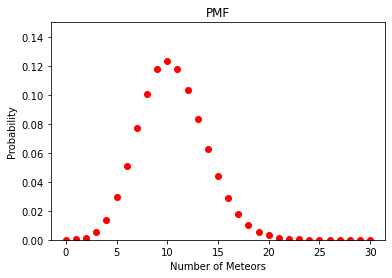

In [24]:
import matplotlib.pyplot as plt

plt.plot(k, pmf, 'ro')
plt.ylim((0,0.15))
plt.xlabel("Number of Meteors")
plt.ylabel("Probability")
plt.title("PMF")

%%latex
\pagebreak

**CDF:** $\forall x\in\mathbb{R}$ $F_{\cal{B}}(x)=P(X\le x)=e^{-10.5}\sum\limits_{i=1}^{k}\frac{10.5^k e^{-10.5}}{k!}=\frac{\Gamma(k+1,10.5)}{k!}$

**Graph for CDF**

Text(0.5, 1.0, 'CDF for Number of Meteors Hitting Earth')

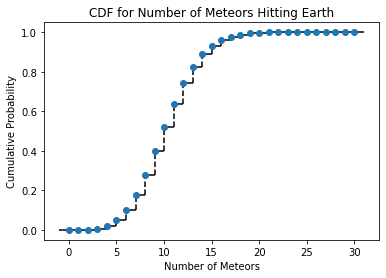

In [23]:
fig, ax = plt.subplots()

# https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.hlines.html
ax.hlines(y=cdf[:-1], xmin=k[:-1], xmax=k[1:],
          zorder=1)

ax.hlines(y=[0], xmin=[-1], xmax=[0],
          zorder=1)

ax.hlines(y=[1], xmin=[30], xmax=[31],
          zorder=1)

# https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.vlines.html
ax.vlines(x=k[1:], ymin=cdf, ymax=cdf[1:], 
          linestyle='dashed', zorder=1)

ax.vlines(x=[0], ymin=[0], ymax=cdf[0], 
          linestyle='dashed', zorder=1)

ax.scatter(k,cdf)
plt.xlabel("Number of Meteors")
plt.ylabel("Cumulative Probability")
plt.title("CDF for Number of Meteors Hitting Earth")

**Mean:** $10.5$

**Variance:** $10.5$

**Mode**: 10

## Geometric Distribution

The geometric distribution describes the situation where we repeat a Bernoulli trial with probability $p\in[0,1]$ until we get a success.

The support for the distribution is the number of trials, $k\in\mathbb{Z}^+$

A cannonical example is flipping a coin until we get a heads.

### PMF

Given distribution $X\sim\text{Geo}(p)$, $\forall k\in\mathbb{Z}^+$, $f_X(k)=P(X=k)=(1-p)^{k-1}p$

### CDF

Given distribution $X\sim\text{Geo}(p)$, $\forall x\in\mathbb{R}$, $F_X(x)=\begin{cases}0 & k<1 \\ 1-(1-p)^{\lfloor k\rfloor} & k\ge1\end{cases}$

#### Proof

The support is all positive integers, which means that any value less than 1 would have cumulative probability 0. For all $x\in\mathbb{R}$ in the region where $x\ge1$, we have a geometric sum where the rate is $1-p$ and the initial value of the series at $x=1$ is $p$. We will use the formula for the sum of a finite geometric series to give us the CDF.

$S_k=p\bigg(\frac{1-(1-p)^k}{1-(1-p)}\bigg)=p\bigg(\frac{1-(1-p)^k}{p}\bigg)=1-(1-p)^k$

### Mean

Given distribution $X\sim\text{Geo}(p)$, $\mathbb{E}[X]=\frac{1}{p}$

#### Proof

**Lemma: $\sum\limits_{i=1}^\infty k\cdot (1-p)^{k-1}=\sum\limits_{k=1}^\infty\sum\limits_{i=k}^\infty (1-p)^{i-1}$**

\begin{align}
\sum\limits_{i=1}^\infty i\cdot (1-p)^{i-1}&=\sum\limits_{i=1}^\infty i\cdot (1-p)^{i-1} \\
&=\sum\limits_{i=1}^\infty (1-p)^{i-1}+\sum\limits_{i=1}^\infty (i-1)\cdot (1-p)^{i-1}=\sum\limits_{i=1}^\infty (1-p)^{i-1}+\sum\limits_{i=2}^\infty (i-1)\cdot (1-p)^{i-1} \\
&=\sum\limits_{i=1}^\infty (1-p)^{i-1}+\sum\limits_{i=2}^\infty (1-p)^{i-1}+\sum\limits_{i=2}^\infty (i-2)\cdot (1-p)^{i-1} \\
&=\sum\limits_{i=1}^\infty (1-p)^{i-1}+\sum\limits_{i=2}^\infty (1-p)^{i-1}+\sum\limits_{i=3}^\infty (i-2)\cdot (1-p)^{i-1} \\
&=\sum\limits_{i=1}^\infty (1-p)^{i-1}+\sum\limits_{i=2}^\infty (1-p)^{i-1}+\dots+\sum\limits_{i=k+1}^\infty (i-k)\cdot (1-p)^{i-1} \\
\end{align}

If we let $k\to\infty$, we obtain

\begin{align}
\sum\limits_{i=1}^\infty (1-p)^{i-1}+\sum\limits_{i=2}^\infty (1-p)^{i-1}+\dots+\sum\limits_{i=k+1}^\infty (i-k)\cdot (1-p)^{i-1} &=\sum\limits_{i=1}^\infty (1-p)^{i-1}+\sum\limits_{i=2}^\infty (1-p)^{i-1}+\sum\limits_{i=3}^\infty (1-p)^{i-1}+\sum\limits_{i=4}^\infty (1-p)^{i-1}+\dots \\
&=\sum\limits_{k=1}^\infty\sum\limits_{i=k}^\infty(1-p)^{i-1}
\end{align}

**Claim: Given distribution $X\sim\text{Geo}(p)$, $\mathbb{E}[X]=\frac{1}{p}$**

\begin{align}
\sum\limits_{i=1}^\infty i\cdot (1-p)^{i-1}&=\sum\limits_{i=1}^\infty i\cdot (1-p)^{i-1}p=p\sum\limits_{i=1}^\infty i\cdot (1-p)^{i-1} \\
&=p\sum\limits_{k=1}^\infty\sum\limits_{i=k}^\infty(1-p)^{i-1}=p\sum\limits_{k=1}^\infty\frac{(1-p)^{k-1}}{1-(1-p)} \\
&=p\sum\limits_{k=1}^\infty\frac{(1-p)^{k-1}}{p}=\sum\limits_{k=1}^\infty(1-p)^{k-1}=\frac{1}{1-(1-p)}=\frac{1}{p}
\end{align}

### Variance

Given distribution $X\sim\text{Geo}(p)$, $\text{Var}(X)=\frac{1-p}{p^2}$

#### Proof

### Mode

Given distribution $X\sim\text{Geo}(p)$, the mode is 1.

#### Proof

We know $p\in(0,1]$ and thus $1-p<1$. This means that the PMF of $X$ monotonically decreases. Hence, the mode is 1.

### Median

Given $X\sim\text{Geo}(p)$, the median is $\big\lceil\frac{-1}{\log_2(1-p)}\big\rceil$. This value is not unique when $\frac{-1}{\log_2(1-p)}$ is an integer.

#### Proof